Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

# displaying sample images

In [1]:
import retinoto_py as fovea
N_show = 6
args = fovea.Params(batch_size=N_show)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	 user laurentperrinet	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 1998 has been set.


Params(image_size=224, do_mask=False, num_epochs=5, n_train_stop=0, seed=1998, batch_size=6, label_smoothing=0.0, model_name='resnet18', do_scratch=False, shuffle=True, num_workers=2, verbose=True)

In [2]:
from retinoto_py import get_loader, imshow
VAL_DATA_DIR = args.DATAROOT / 'Imagenet_full' / 'val'
val_loader, class_to_idx, idx_to_class = get_loader(args, VAL_DATA_DIR)

In [3]:
for images, labels in val_loader:
    images, labels = images.to('cpu'), labels.to('cpu')
    break


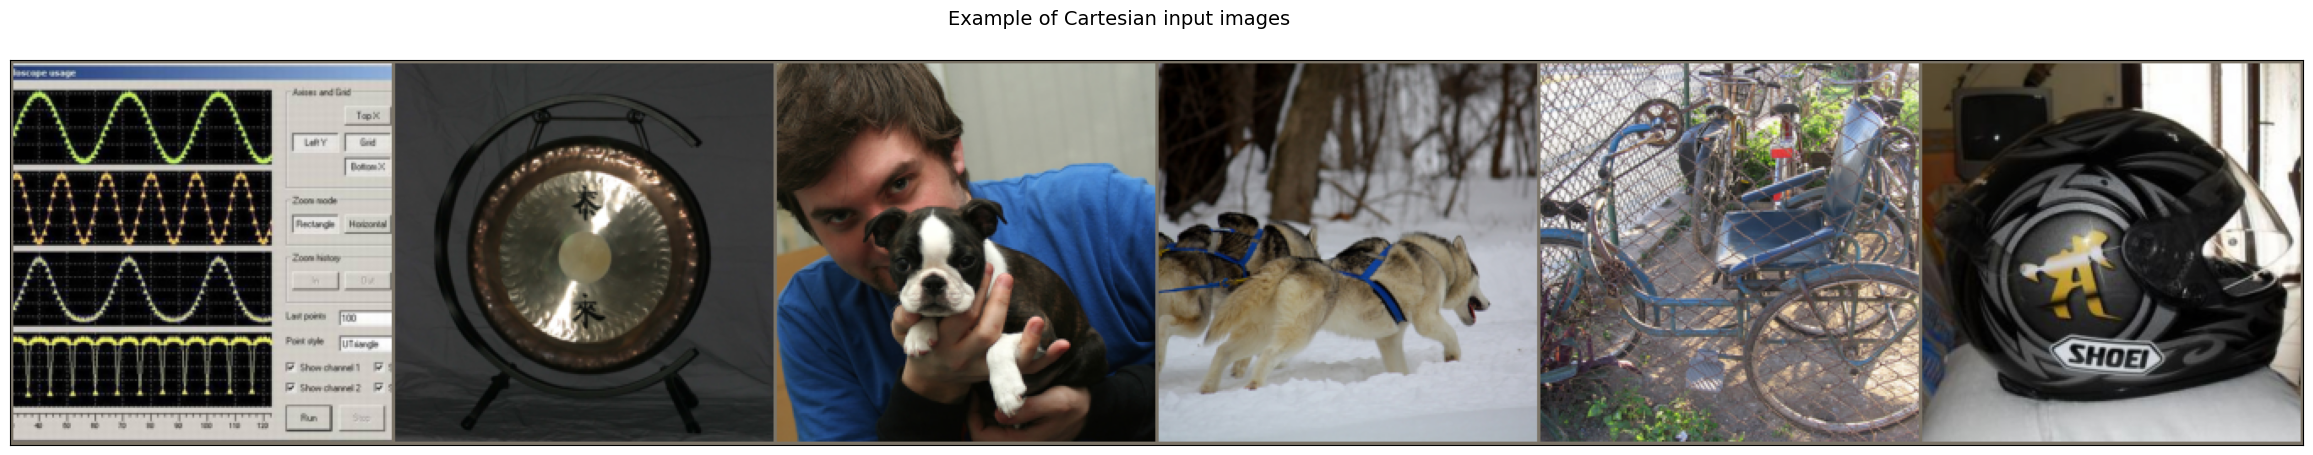

In [4]:
import matplotlib.pyplot as plt
fig, ax = imshow(images, title='Example of Cartesian input images', fig_height=5)
plt.show()


# displaying sample images with a mask

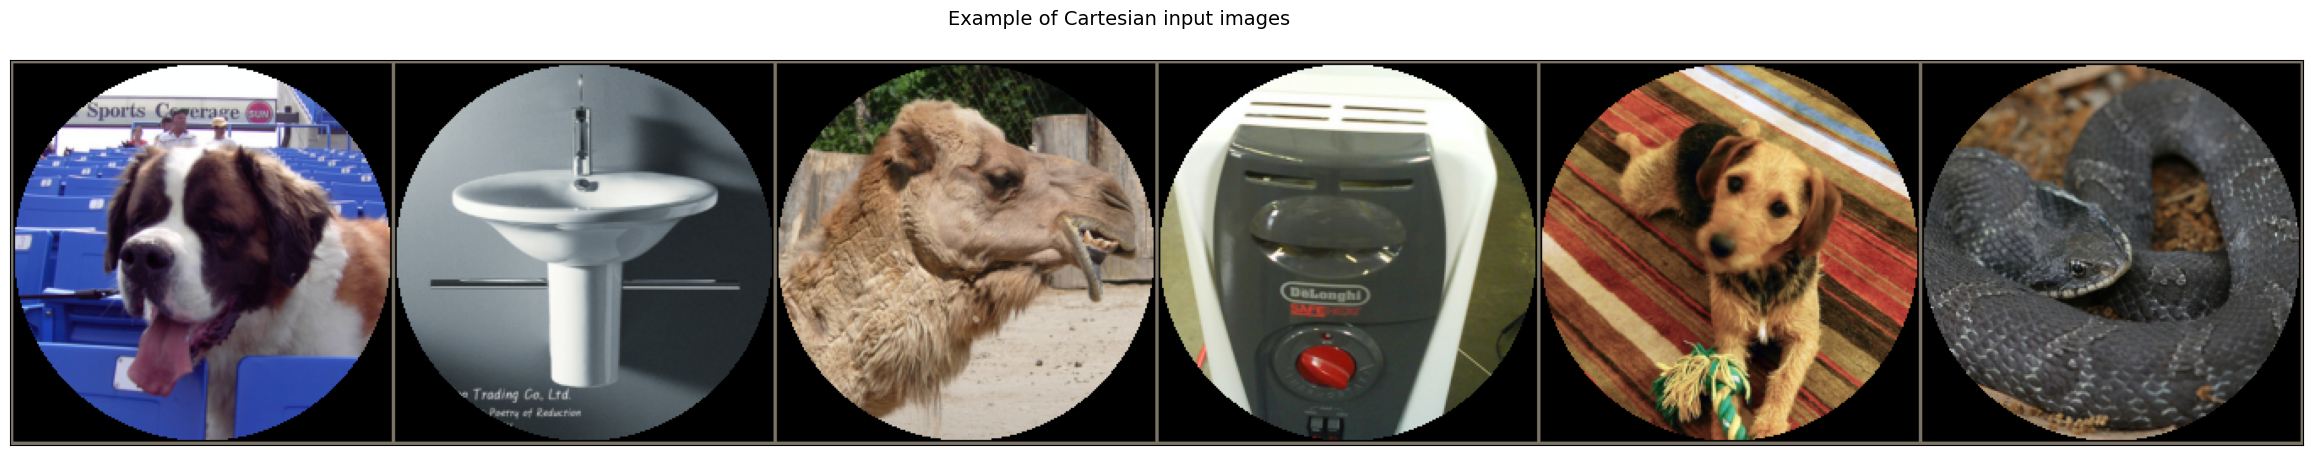

In [5]:
args = fovea.Params(batch_size=N_show, do_mask=True)
val_loader, class_to_idx, idx_to_class = get_loader(args, VAL_DATA_DIR)
for images, labels in val_loader:
    images, labels = images.to('cpu'), labels.to('cpu')
    break
fig, ax = imshow(images, title='Example of Cartesian input images', fig_height=5)
plt.show()


# displaying sample images with a rotation

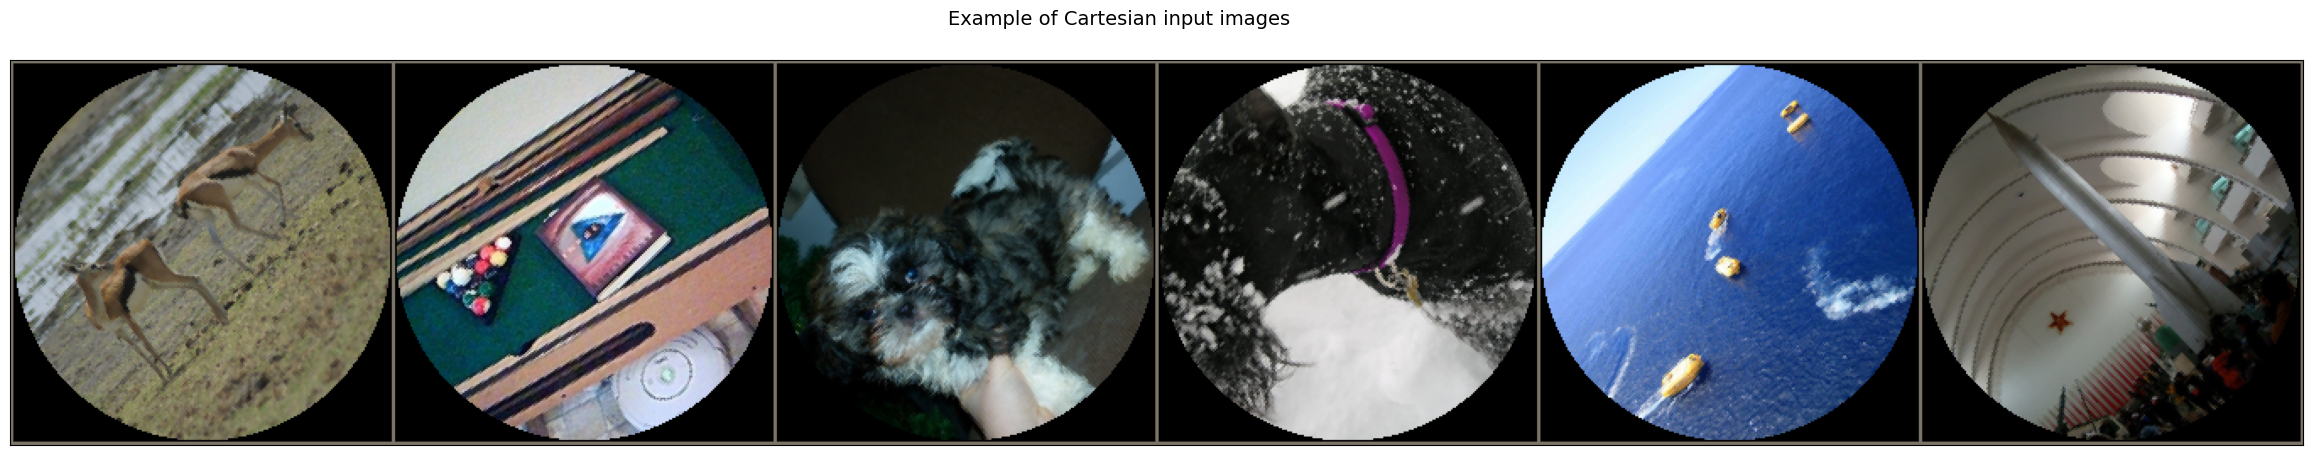

In [6]:
args = fovea.Params(batch_size=N_show, do_mask=True)
val_loader, class_to_idx, idx_to_class = get_loader(args, VAL_DATA_DIR, angle_min=40, angle_max=50)
for images, labels in val_loader:
    images, labels = images.to('cpu'), labels.to('cpu')
    break
fig, ax = imshow(images, title='Example of Cartesian input images', fig_height=5)
plt.show()


# testing each network for different rotations

In [7]:
import numpy as np
all_angles = np.linspace(-180, 180, 121) #, dtype=int)
all_angles = np.linspace(0, 360, 4) #, dtype=int)
all_angles = np.linspace(0, 180, 12) #, dtype=int)
all_angles = np.linspace(0, 180, 24) #, dtype=int)
all_angles

array([  0.        ,  16.36363636,  32.72727273,  49.09090909,
        65.45454545,  81.81818182,  98.18181818, 114.54545455,
       130.90909091, 147.27272727, 163.63636364, 180.        ])

In [8]:
delta_angle = all_angles[1] - all_angles[0]
all_angles_min = all_angles - delta_angle / 2
all_angles_min, all_angles_min + delta_angle, delta_angle

(array([ -8.18181818,   8.18181818,  24.54545455,  40.90909091,
         57.27272727,  73.63636364,  90.        , 106.36363636,
        122.72727273, 139.09090909, 155.45454545, 171.81818182]),
 array([  8.18181818,  24.54545455,  40.90909091,  57.27272727,
         73.63636364,  90.        , 106.36363636, 122.72727273,
        139.09090909, 155.45454545, 171.81818182, 188.18181818]),
 np.float64(16.363636363636363))

In [9]:
for model_name in  ['resnet18', 'resnet50', 'resnet101'] :
    print(f'{model_name=}')



model_name='resnet18'
model_name='resnet50'
model_name='resnet101'


In [10]:
for angles_min, angles_max in zip(all_angles_min, all_angles_min + delta_angle):
    print(f'{np.mod(angles_min,360)=:.3f}\t{np.mod(angles_max, 360)=:.3f}')

np.mod(angles_min,360)=351.818	np.mod(angles_max, 360)=8.182
np.mod(angles_min,360)=8.182	np.mod(angles_max, 360)=24.545
np.mod(angles_min,360)=24.545	np.mod(angles_max, 360)=40.909
np.mod(angles_min,360)=40.909	np.mod(angles_max, 360)=57.273
np.mod(angles_min,360)=57.273	np.mod(angles_max, 360)=73.636
np.mod(angles_min,360)=73.636	np.mod(angles_max, 360)=90.000
np.mod(angles_min,360)=90.000	np.mod(angles_max, 360)=106.364
np.mod(angles_min,360)=106.364	np.mod(angles_max, 360)=122.727
np.mod(angles_min,360)=122.727	np.mod(angles_max, 360)=139.091
np.mod(angles_min,360)=139.091	np.mod(angles_max, 360)=155.455
np.mod(angles_min,360)=155.455	np.mod(angles_max, 360)=171.818
np.mod(angles_min,360)=171.818	np.mod(angles_max, 360)=188.182


In [11]:
# import torch
# VAL_DATA_DIR = args.DATAROOT / 'Imagenet_full' / 'val'
# from retinoto_py import load_model
# model = load_model(args)
# model.eval()
# from retinoto_py import get_loader

# npz_filename = args.data_cache / f'12_all_{args.model_name}.npz'

# # https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html 
# criterion = torch.nn.CrossEntropyLoss(reduction='none')

# all_results = np.empty((len(all_angles)-1, len(val_loader.dataset))) 
# all_losses = np.empty((len(all_angles)-1, len(val_loader.dataset))) 
# for i_angle, (angle_min, angle_max) in enumerate(zip(all_angles_min[:-1], all_angles_min[:-1] + delta_angle)):
#     args = fovea.Params(shuffle=False, do_mask=True)
#     val_loader, class_to_idx, idx_to_class = get_loader(args, VAL_DATA_DIR, angle_min=angle_min, angle_max=angle_max)

#     correct_predictions = 0
#     total_predictions = 0

#     image_count = 0
#     for images, true_labels in val_loader:
#         print(f'Processing angle {i_angle+1}/{len(all_angles)-1} \t images {image_count}/{len(val_loader.dataset)}', end='\r')
#         images = images.to(args.device)
#         true_labels = true_labels.to(args.device)

#         # Get predictions (no need for gradients)
#         with torch.no_grad():
#             outputs = model(images)
#             _, predicted_labels = torch.max(outputs, dim=1)
#             correct_predictions_in_batch = (predicted_labels == true_labels)
#             all_results[i_angle, image_count:image_count + images.size(0)] = correct_predictions_in_batch.cpu().numpy()
#             loss = criterion(outputs, true_labels)
#             all_results[i_angle, image_count:image_count + images.size(0)] = loss.cpu().numpy()
#         image_count += images.size(0)


In [12]:
npz_filename = args.data_cache / f'12_all_{args.model_name}.npz'

%rm {npz_filename}  # FORCING RECOMPUTE

if npz_filename.exists():
    with np.load(npz_filename) as data:
        # --- 3. Access the arrays inside the 'with' block ---
        # It's good practice to convert to tensors (or whatever final format you need)
        # right away, so you don't need to keep the file open.
        all_logits = data['logits']
        all_losses = data['losses']
        all_results = data['results']
else:
    import torch
    VAL_DATA_DIR = args.DATAROOT / 'Imagenet_full' / 'val'
    from retinoto_py import load_model
    model = load_model(args)
    model.eval()
    from retinoto_py import get_loader

    # https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html 
    criterion = torch.nn.CrossEntropyLoss(reduction='none')

    all_results = np.empty((len(all_angles), len(val_loader.dataset))) 
    all_logits = np.empty((len(all_angles), len(val_loader.dataset), model.fc.out_features)) 
    all_losses = np.empty((len(all_angles), len(val_loader.dataset))) 
    for i_angle, (angle_min, angle_max) in enumerate(zip(all_angles_min, all_angles_min + delta_angle)):
        args = fovea.Params(shuffle=False, do_mask=True)
        val_loader, class_to_idx, idx_to_class = get_loader(args, VAL_DATA_DIR, angle_min=angle_min, angle_max=angle_max)

        correct_predictions = 0
        total_predictions = 0

        image_count = 0
        for images, true_labels in val_loader:
            print(f'Processing angle {i_angle+1}/{len(all_angles)-1} \t images {image_count}/{len(val_loader.dataset)}', end='\r')
            images = images.to(args.device)
            true_labels = true_labels.to(args.device)

            # Get predictions (no need for gradients)
            with torch.no_grad():
                outputs = model(images)
                all_logits[i_angle, image_count:(image_count + images.size(0)), :] = outputs.cpu().numpy()
                _, predicted_labels = torch.max(outputs, dim=1)
                correct_predictions_in_batch = (predicted_labels == true_labels)
                all_results[i_angle, image_count:(image_count + images.size(0))] = correct_predictions_in_batch.cpu().numpy()
                loss = criterion(outputs, true_labels)
                all_losses[i_angle, image_count:(image_count + images.size(0))] = loss.cpu().numpy()
            image_count += images.size(0)
            
    np.savez(npz_filename, 
            logits=all_logits,
            losses=all_losses,
            results=all_results)



In [13]:
all_results.shape

(11, 50000)

In [14]:
all_results.mean(axis=1)

array([0.43064, 0.2887 , 0.25504, 0.21504, 0.14764, 0.15492, 0.14022,
       0.10016, 0.1145 , 0.1055 , 0.09814])

# analysis: average accuracy for different rotations

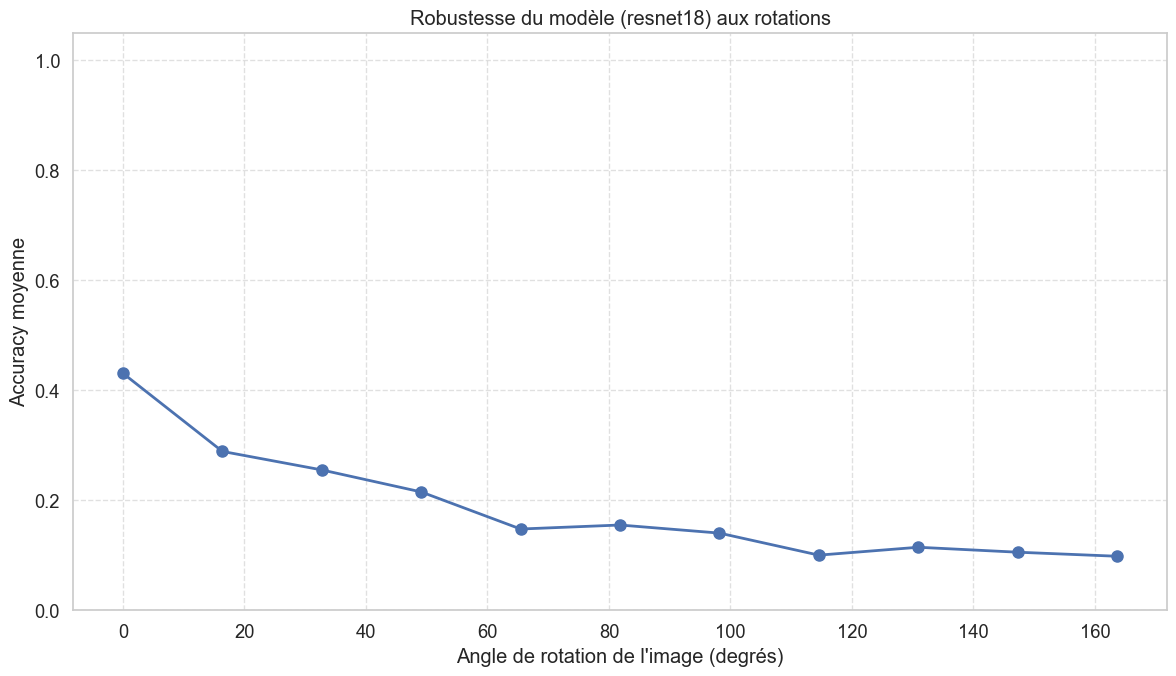

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# `all_results` est un tableau de booléens (True/False pour correct/incorrect)
# Pour calculer la précision, on calcule la moyenne (True=1, False=0) sur l'axe des images (axe=1)
mean_accuracy_per_angle = np.mean(all_results, axis=1)

# --- Création du Plot ---
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 7))

# Tracer l'accuracy moyenne en fonction de l'angle de référence
plt.plot(all_angles[:-1], mean_accuracy_per_angle, marker='o', linestyle='-', lw=2, markersize=8)

# --- Finalisation du Graphique ---
plt.xlabel("Angle de rotation de l'image (degrés)")
plt.ylabel("Accuracy moyenne")
plt.title(f"Robustesse du modèle ({args.model_name}) aux rotations")
plt.ylim(0, 1.05) # S'assurer que l'axe des y est bien entre 0 et 1

# On peut ajouter une ligne horizontale pour la performance de base (angle=0)
# if 0 in all_angles[:-1]:
#     base_accuracy = mean_accuracy_per_angle[all_angles == 0][0]
#     plt.axhline(y=base_accuracy, color='r', linestyle='--', label=f'Performance de base (angle=0): {base_accuracy:.2f}')
#     plt.legend()

plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

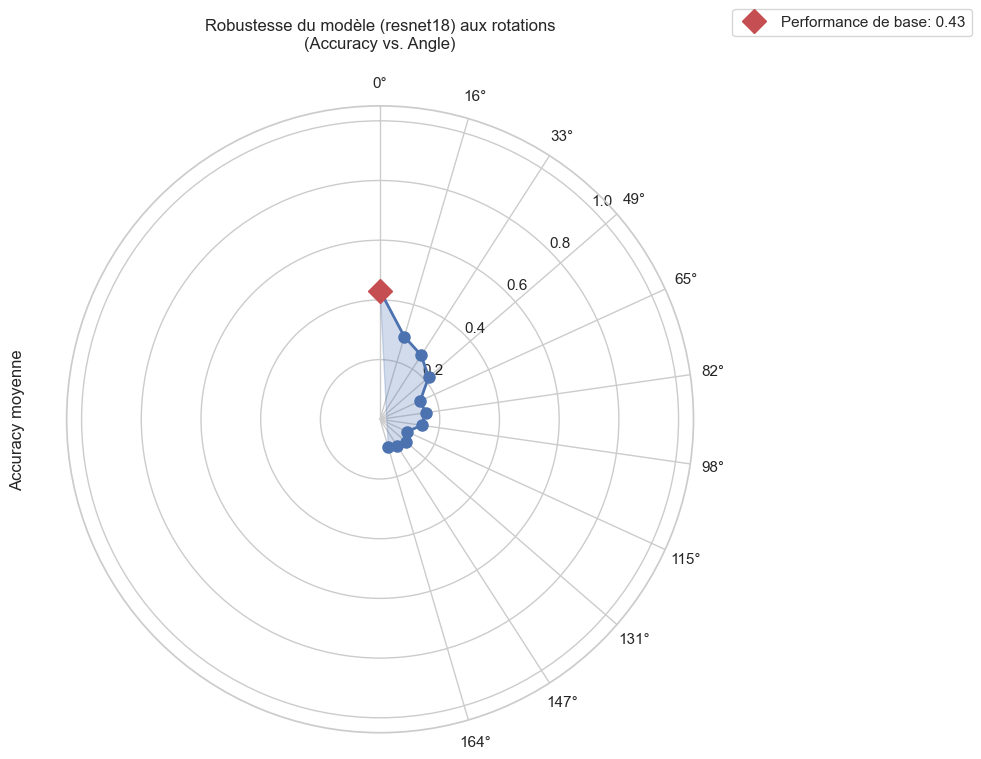

In [17]:

mean_accuracy_per_angle = np.mean(all_results, axis=1)

# --- Création du Polar Plot ---
sns.set_theme(style="whitegrid")

# 1. Créer la figure et l'axe en projection polaire
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# 2. Convertir les angles de degrés en radians (nécessaire pour Matplotlib)
angles_rad = np.deg2rad(all_angles[:-1])

# 3. Tracer les données en coordonnées polaires
ax.plot(angles_rad, mean_accuracy_per_angle, marker='o', linestyle='-', lw=2, markersize=8, color='b')

# 4. Remplir la zone sous la courbe pour un meilleur effet visuel
ax.fill(angles_rad, mean_accuracy_per_angle, alpha=0.25, color='b')

# --- Finalisation du Graphique Polaire ---
# Définir la direction du zéro (haut) et le sens horaire/anti-horaire
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1) # -1 pour horaire, 1 pour anti-horaire

# Définir les étiquettes des angles sur le cercle
# S'assurer que les étiquettes sont alignées
ax.set_thetagrids(np.degrees(angles_rad), labels=[f'{a:.0f}°' for a in all_angles[:-1]])

# Définir les limites et les étiquettes de l'axe radial (l'accuracy)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Accuracy moyenne", labelpad=30) # labelpad pour éloigner l'étiquette du graphique
ax.set_rlabel_position(45) # Positionner l'étiquette de l'axe radial

# Ajouter un titre
plt.title(f"Robustesse du modèle ({args.model_name}) aux rotations\n(Accuracy vs. Angle)", pad=20)

# Ajouter la ligne de performance de base (angle=0)
# Il faut trouver l'index de l'angle le plus proche de 0
zero_angle_idx = (np.abs(all_angles[:-1])).argmin()
base_accuracy = mean_accuracy_per_angle[zero_angle_idx]
ax.plot(angles_rad[zero_angle_idx], base_accuracy, 'rD', markersize=12, label=f'Performance de base: {base_accuracy:.2f}')
ax.legend(loc='lower left', bbox_to_anchor=(1.05, 1.1))


plt.tight_layout()
plt.show()